<a href="https://colab.research.google.com/github/subagayathri/MultipleRegression/blob/main/Multiple_Linear_Regression_(students_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv('student.csv')
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
df.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


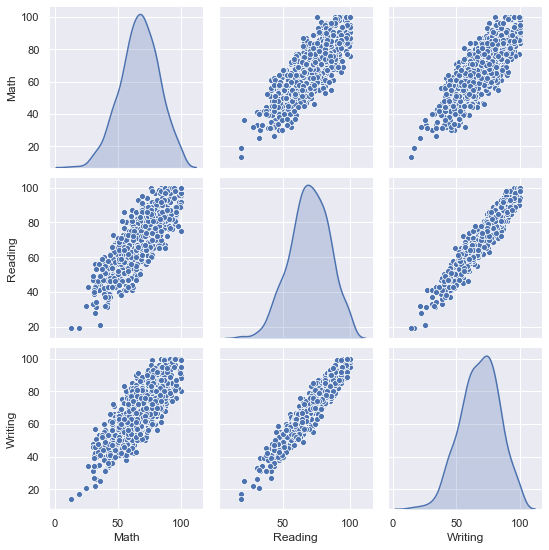

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
x = df[['Math','Reading']].values
y = df['Writing'].values

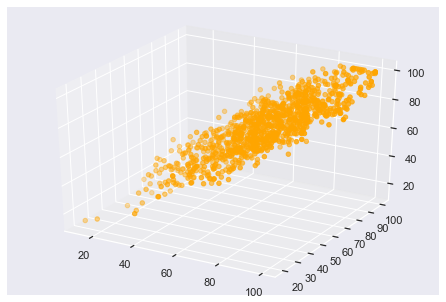

In [ ]:
math = df['Math'].values
read = df['Reading'].values
write = df['Writing'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math,read,write,color='orange')
plt.show()

In [ ]:
import statsmodels.api as sm
reg_ols = sm.OLS(endog=y,exog=x).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.169e+05
Date:                Sat, 12 Sep 2020   Prob (F-statistic):                        0.00
Time:                        12:11:45   Log-Likelihood:                         -2941.1
No. Observations:                1000   AIC:                                      5886.
Df Residuals:                     998   BIC:                                      5896.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0891      0.016      5.601      0.000       0.058       0.120
x2             0.8970      0.015     58.370      0.000       0.867       0.927
==============================================================================
Omnibus:                        0.601   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.474
Skew:                          -0.011   Prob(JB):                        0.789
Kurtosis:                       3.104   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.corrcoef(math,write)

array([[1.       , 0.8011596],
       [0.8011596, 1.       ]])

In [ ]:
np.corrcoef(math,read)

array([[1.        , 0.80646915],
       [0.80646915, 1.        ]])

In [ ]:
np.corrcoef(write,read)[0,1]

0.9522256981148811

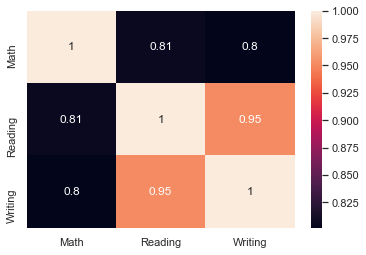

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#VIF(multicollinearity) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = add_constant(df)

In [ ]:
X.shape

(1000, 4)

In [ ]:
X.values

array([[ 1., 48., 68., 63.],
       [ 1., 62., 81., 72.],
       [ 1., 79., 80., 78.],
       ...,
       [ 1., 89., 87., 94.],
       [ 1., 83., 82., 78.],
       [ 1., 66., 66., 72.]])

In [ ]:
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y,y_pred)
print('mse is :',mse)
print('rmse is :',np.sqrt(mse))

mse is : 20.911295988853357
rmse is : 4.572887051836439


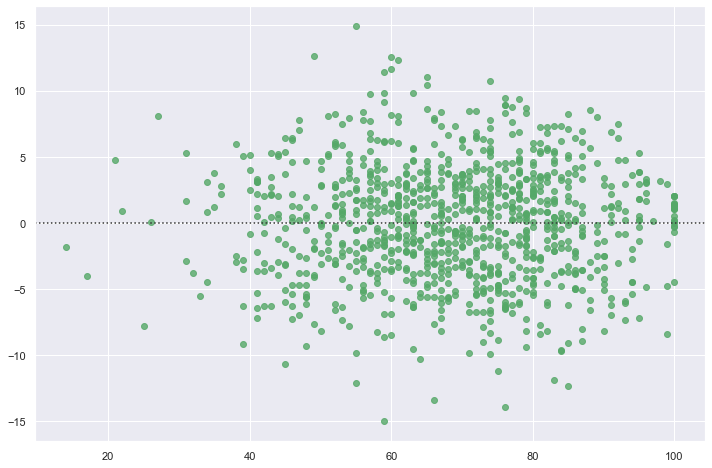

In [ ]:
plt.figure(figsize=(12,8))
sns.residplot(y,y_pred,color='g')

In [ ]:
reg.score(x,y)

0.9098901726717316

In [ ]:
def predi(x):
    predicted = reg.predict(x)
    return predicted

In [ ]:
predi([[76,83]])

array([81.40522186])

# Saving model using pickle

In [ ]:
import pickle

In [ ]:
filename = 'final_write.sav'

In [ ]:
pickle.dump(reg,open(filename,'wb'))